In [ ]:
#重回帰モデル

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('myoken0.xlsx', index_col='日時')
df=df[['損失水頭_3号', 'ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']]
df=df.interpolate(method='linear') #補間 #linear, time, index, values, nearest, zero, slinear, quadratic, cubic, barycentric, krogh, polynomial, spline, piecewise_polynomial, pchip #linear:値を等間隔に扱う、time:指定された長さの間隔を補間、index/values:インデックスの実際の数値、pad:既存の値を利用 #datetime型のindexの場合、indexが良い
df=df.rolling(7).mean() #移動平均 #Trueで中央に値を配置
df=df.dropna() #欠損値除去

x=df[['ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']] #入力値
y=df[['損失水頭_3号']] #出力値
x=(x-x.min())/(x.max()-x.min()) #正規化


In [2]:
#データの分割
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=False)

#重回帰分析インスタンス
zyukaiki=LinearRegression()

#モデルの学習
zyukaiki.fit(x_train, y_train)

#予測値(学習データ)
y_train_yosoku=zyukaiki.predict(x_train)

#予測値(テストデータ)
y_test_yosoku=zyukaiki.predict(x_test)


#偏回帰係数
df_coef=pd.DataFrame(zyukaiki.coef_.reshape(1,6), columns=['ろ過速度h', '処理水濁度_1系', '処理水濁度_2系','PAC注入量34', '水温U3', 'ろ過継続時間'])
print(df_coef)

#
print('切片: %.2f' %zyukaiki.intercept_)

      ろ過速度h  処理水濁度_1系  処理水濁度_2系  PAC注入量34       U3    ろ過継続時間
0  0.689161 -0.151343  0.007803 -0.538196 -0.49769  1.494537
切片: 0.01


In [3]:
#決定係数
from sklearn.metrics import r2_score
#RMSE
from sklearn.metrics import mean_squared_error

#RMSE
print('RMSE 学習: %.2f, テスト: %.2f' %(
    mean_squared_error(y_train, y_train_yosoku, squared=False),
    mean_squared_error(y_test, y_test_yosoku, squared=False)
))

#決定係数
print('R^2 学習: %.2f, テスト: %.2f' %(
    r2_score(y_train, y_train_yosoku),
    r2_score(y_test, y_test_yosoku)
))

RMSE 学習: 0.16, テスト: 0.14
R^2 学習: 0.86, テスト: 0.91


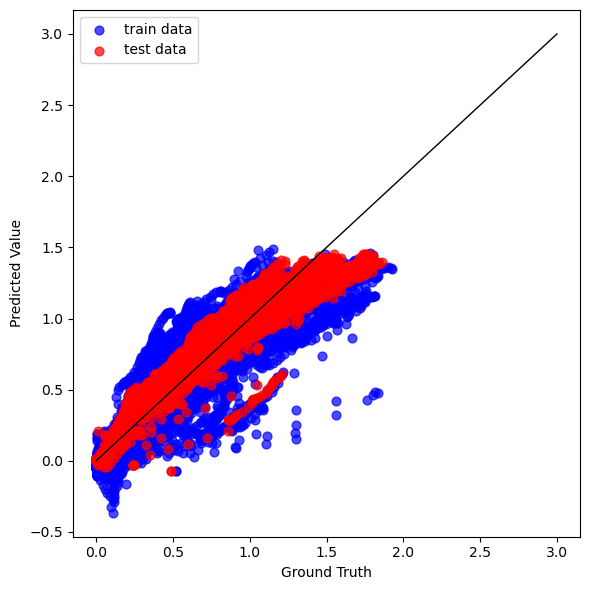

In [5]:
plt.figure(figsize=(6, 6))
plt.plot([0, 3], [0, 3], linewidth=1, c='black')
#予測値と実測値　学習データ
plt.scatter(y_train,
            y_train_yosoku,
            c='blue',
            marker='o',
            s=40,
            alpha=0.7,
            label='train data')

#予測値と実測値　テストデータ
plt.scatter(y_test,
            y_test_yosoku,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='test data')

#グラフ書式
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

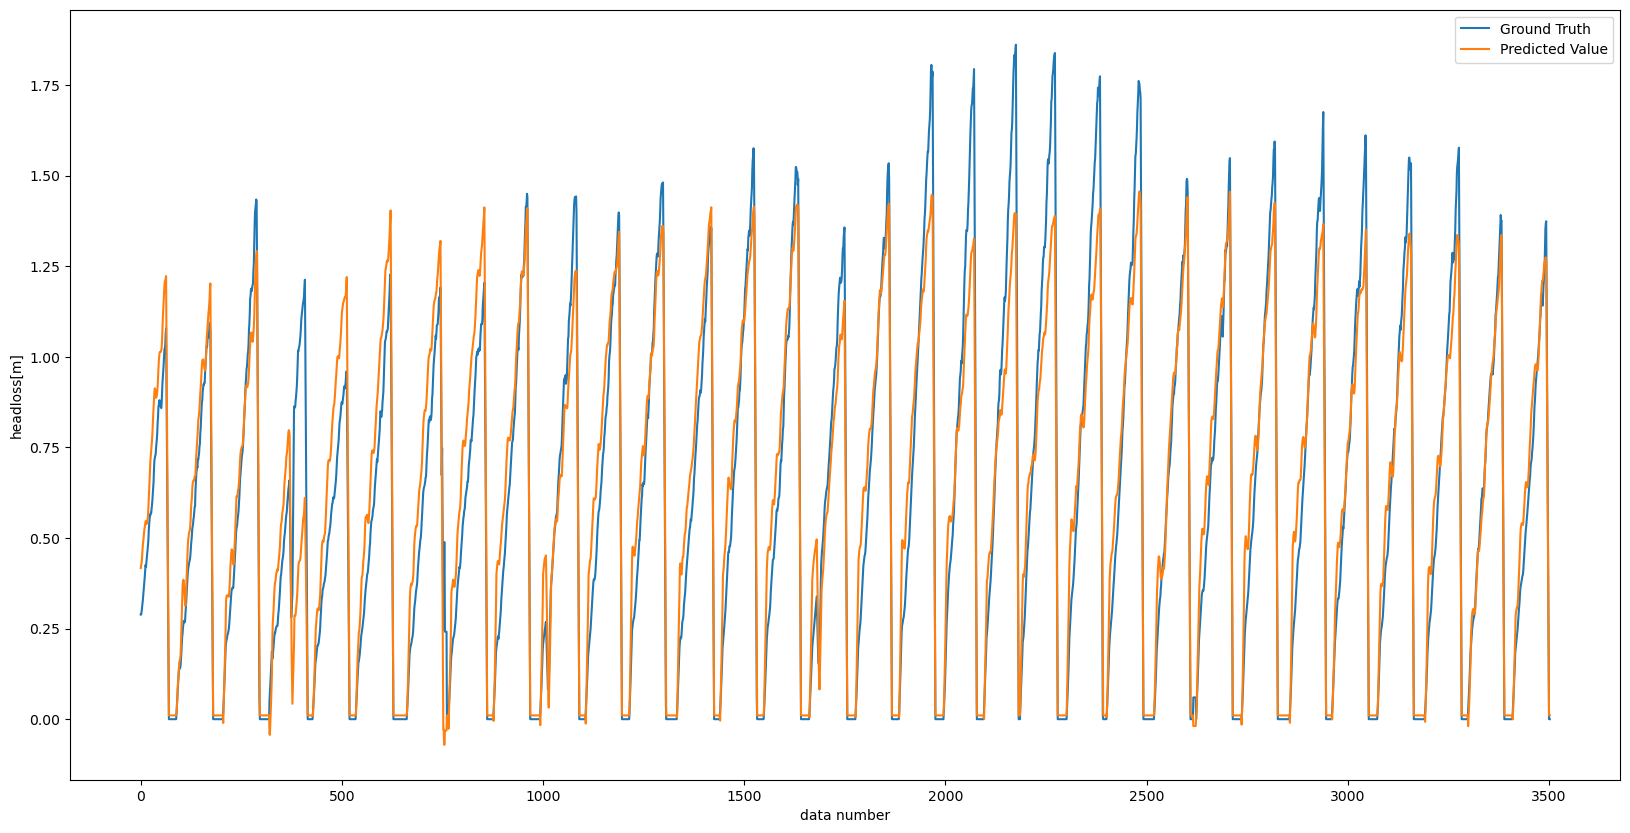

In [9]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Ground Truth")
plt.plot(y_test_yosoku, label="Predicted Value")
plt.legend()
plt.xlabel('data number')
plt.ylabel('headloss[m]')
plt.show()

In [21]:
#csvファイルの中身
predict_df = pd.DataFrame()
predict_df['test'] = y_test
predict_df['pred'] = y_test_yosoku

#csvファイルに保存
predict_df.to_csv('./mlr.csv', index=True)